In [9]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
from prophet import Prophet
from dotenv import load_dotenv
import os

load_dotenv

apikey = os.getenv("apikey")
apisecret =os.getenv("apisecret")


client = Client(apikey, apisecret)

historical_data = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 July 2023')

hist_df = pd.DataFrame(historical_data)

hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close Value', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')                                                     #Converting values
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')
numeric_columns = ['Open', 'High', 'Low', 'Close Value', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)


df= pd.DataFrame(hist_df, columns=['Open Time','Close Value'])



In [10]:
df = df.rename(columns={'Open Time': 'ds','Close Value': 'y'})

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=30)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


15:06:14 - cmdstanpy - INFO - Chain [1] start processing
15:06:14 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
123,2023-11-01,28923.643865,27712.326033,30153.506157
124,2023-11-02,28789.265455,27463.152830,29961.761844
125,2023-11-03,28774.109337,27407.378296,29985.696390
126,2023-11-04,28809.696790,27440.074641,30068.746283
127,2023-11-05,28956.475618,27507.085095,30305.739582


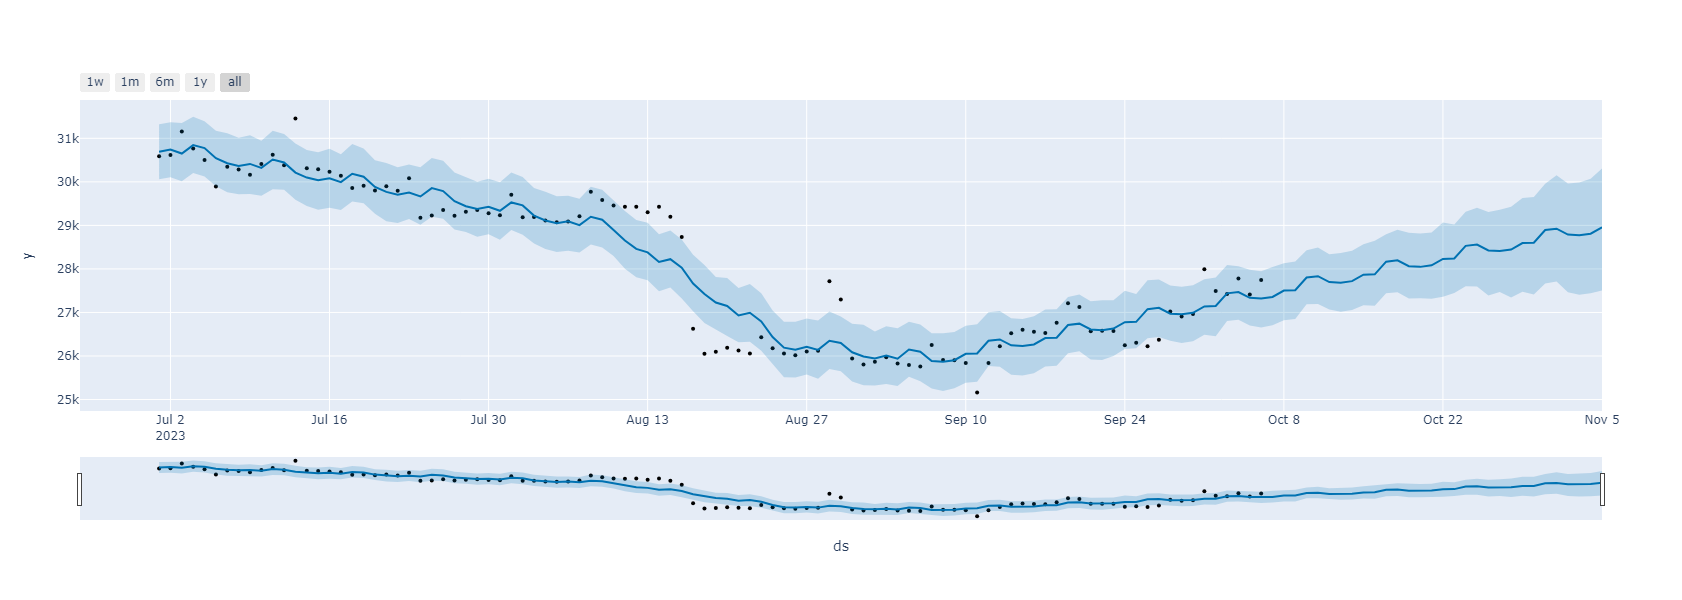

In [11]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


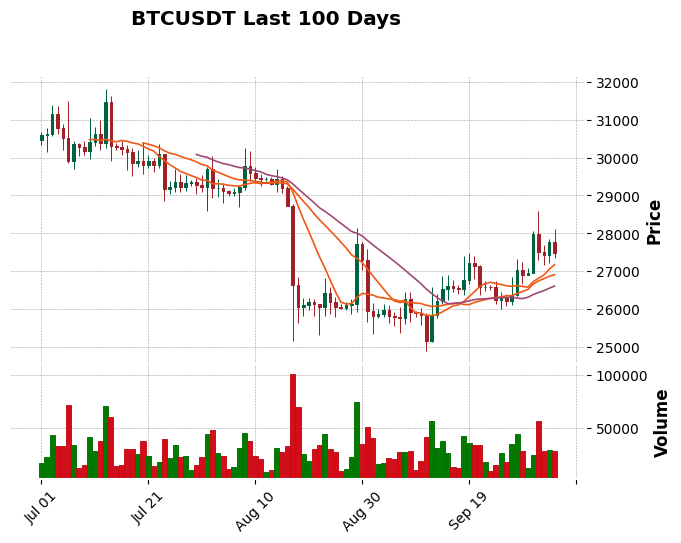

In [39]:
import mplfinance as mpf

mpf.plot(hist_df.set_index('Close Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDT Last 100 Days', 
        mav=(10,20,30))